<a href="https://colab.research.google.com/github/NagumalliSowmika/The-Sparks-Foundation-Tasks/blob/main/Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Sparks Foundation Task-3**

**NAME: NAGUMALLI SOWMIKA**

**Task:** For the given iris dataset,creating the decision tree classifier and visualizing it.
If any new data is fit into the classifier,it would be able to predict the right class accordingly.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus 
import warnings
warnings.filterwarnings('ignore')

**Importing dataset**

In [46]:
df = pd.read_excel('Iris.xlsx')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape

(150, 6)

**Data Cleaning**

In [4]:
df=df.drop(columns=['Id'],axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
#represents statistical information
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
#checking forr null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


**Visualizing the Data**

In [44]:
from matplotlib import style
style.use('dark_background')

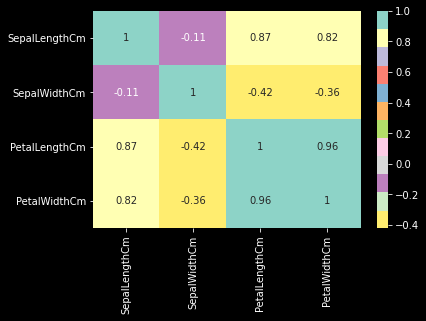

In [10]:
sns.heatmap(df.corr(),annot=True,cmap='Set3_r')
plt.show()

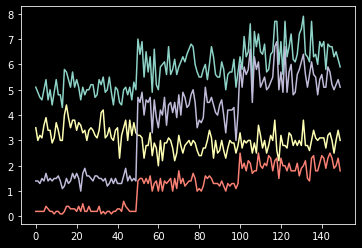

In [11]:
plt.plot(df.iloc[:,:4])
plt.show()

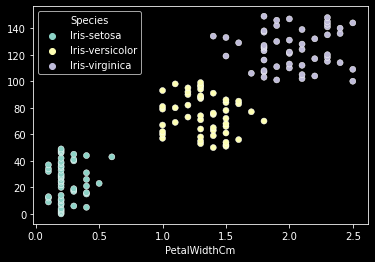

In [12]:
sns.scatterplot(df['PetalWidthCm'],df.index,hue=df.Species)
plt.show()

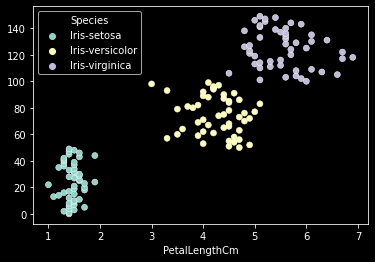

In [13]:
sns.scatterplot(df['PetalLengthCm'],df.index,hue=df.Species)
plt.show()

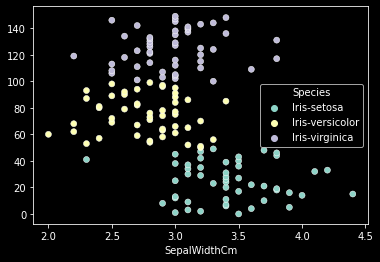

In [14]:
sns.scatterplot(df['SepalWidthCm'],df.index,hue=df.Species)
plt.show()

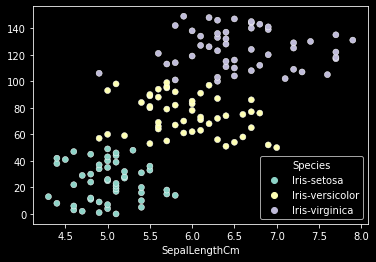

In [15]:
sns.scatterplot(df['SepalLengthCm'],df.index,hue=df.Species)
plt.show()

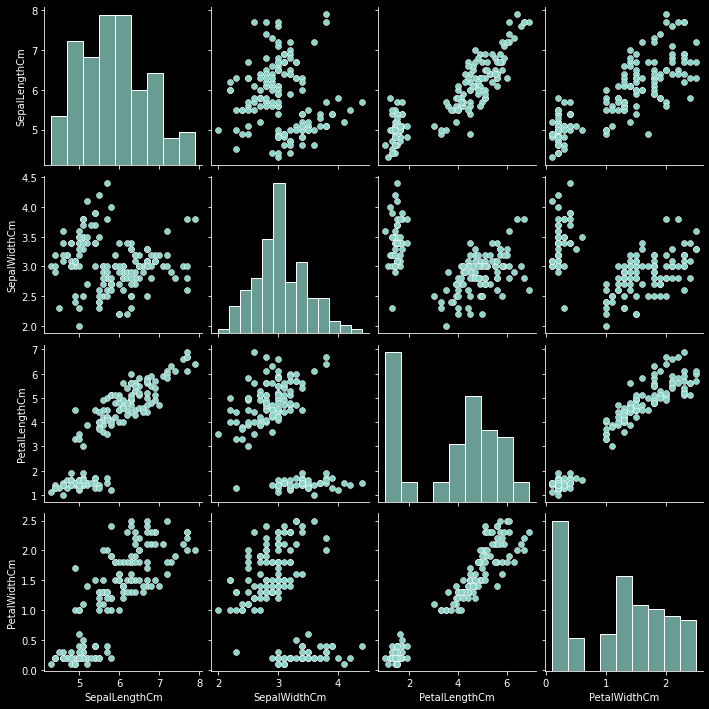

In [16]:
sns.pairplot(df)
plt.show()

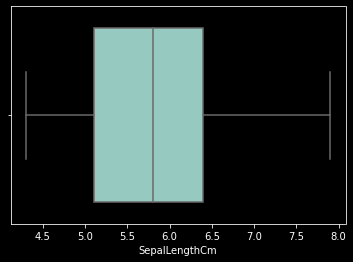

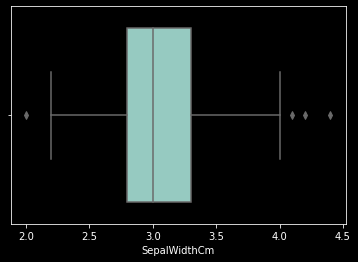

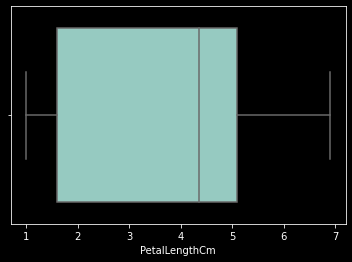

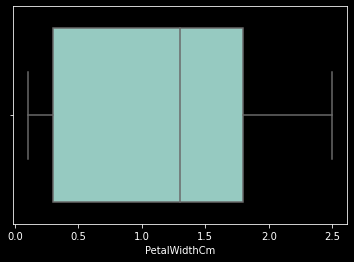

In [17]:
#Checking outliers 
for i in df.describe().columns:
  sns.boxplot(df[i])
  plt.show()

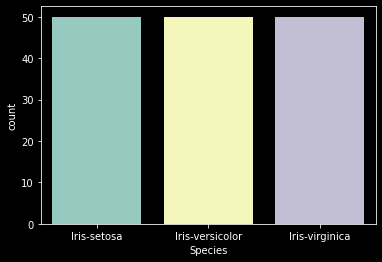

In [18]:
sns.countplot(df.Species)
plt.show()

**Data Preprocessing**

Removing outliers

In [19]:
outlier = df['SepalWidthCm'].quantile(0.99)

In [20]:
#Removing  the top 1% data from the SepalWidthCM
cleaned_data = df[df['SepalWidthCm']<outlier]
cleaned_data.shape

(148, 5)

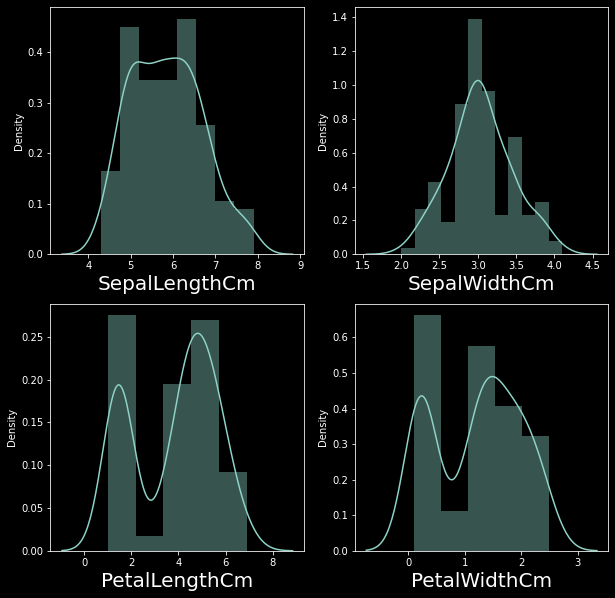

In [21]:
#data distribution in each column
plt.figure(figsize=(10,10),facecolor=None)
plotnumber = 1
for column in cleaned_data.iloc[:,:4]:
  if plotnumber<=9:
    ax=plt.subplot(2,2,plotnumber)
    sns.distplot(cleaned_data[column])
    plt.xlabel(column,fontsize=20)
  plotnumber += 1
plt.show()    


In [23]:
cleaned_data.Species.value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        48
Name: Species, dtype: int64

In [24]:
x = cleaned_data.drop(['Species'],axis=1) #independent variable
y = cleaned_data['Species'] #dependent variable

In [25]:
x.shape

(148, 4)

**Splitting data into train and test**

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.2, random_state = 0)

In [ ]:
x_train.shape,x_test.shape

((118, 4), (30, 4))

**BUILDING MODEL**

Dependent data is categorical in nature so we use deciion tree for classification.
Decision tree algorithm can perform both classification and regression analysis.

In [27]:
Cls = DecisionTreeClassifier()

# Grid Search
-> It is the process of performing hyper parameter tuning inorder to determine the optimum values for a given model.
->The Performance of the entire model is based on the hyper parameters values specified. 

->GridSearchCV function check for all the possible combination for models and gives which is the best value out of this list and check which parameter is best for the model.

In [31]:
grid_param = {
    'criterion': ['gini','entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(2,10,1),
    'splitter' : ['best','random'],
    'max_leaf_nodes' : [10,20,50,100], 
}

In [32]:
grid_search = GridSearchCV(estimator=Cls,param_grid=grid_param,cv=5,n_jobs=-1)

In [33]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [35]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 9, 'max_leaf_nodes': 100, 'min_samples_leaf': 3, 'splitter': 'random'}


In [36]:
grid_search.best_score_

0.9829710144927537

**Building the model by using best parameter**

In [37]:
Cls = DecisionTreeClassifier(criterion='gini',max_depth=14,max_leaf_nodes=20,min_samples_leaf=2,min_samples_split=9,splitter = 'random')
Cls.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=14, max_features=None, max_leaf_nodes=20,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

Accuracy for train and test models

In [38]:
y_test_pred = Cls.predict(x_test)
y_train_pred = Cls.predict(x_train)

In [39]:
acc_test = accuracy_score(y_test,y_test_pred)
acc_train = accuracy_score(y_train,y_train_pred)

In [40]:
print(acc_train)
print(acc_test)

0.9576271186440678
0.9666666666666667


In [41]:
con_mat = confusion_matrix(y_test,y_test_pred)

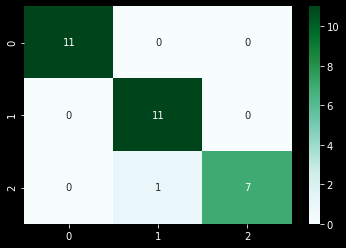

In [42]:
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True,cmap='BuGn')
plt.show()

**Visualizing the tree**

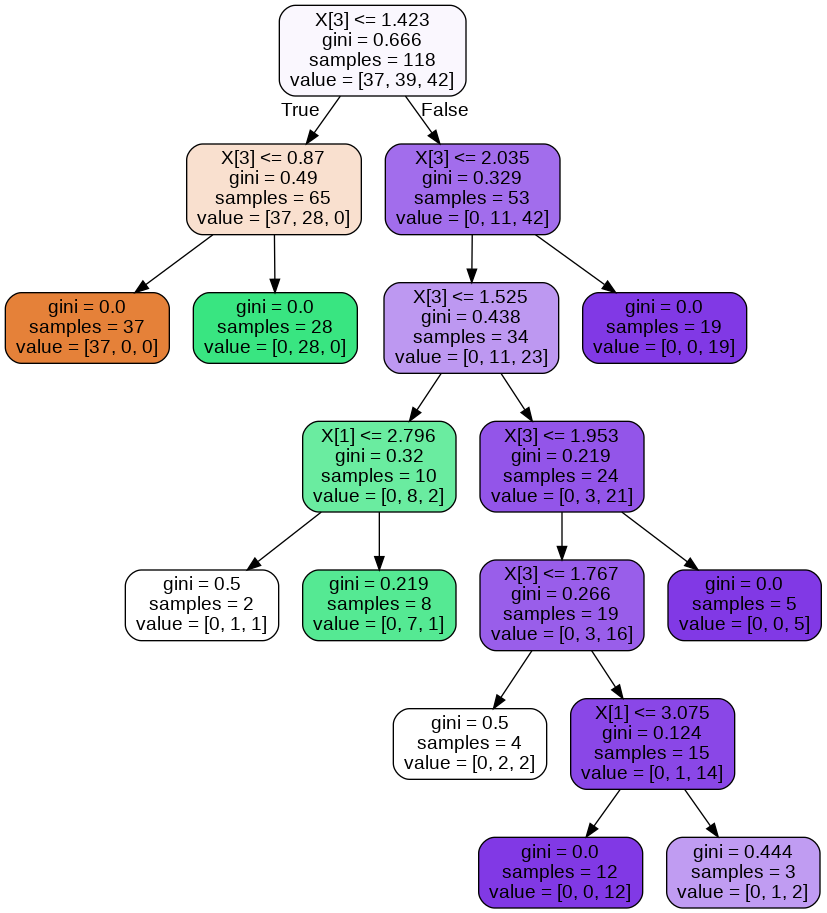

In [45]:
feature_name = list(x.columns)
class_name = list(y_train.unique())

dot_data = export_graphviz(Cls,rounded=True,filled=True)

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

You can now feed any new/test data to this classifer and it would be able to predict the right class accordingly.